### Library Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [4]:
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['figure.facecolor'] = '#00000000'

### Data Inputs

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/shelly2904/DATA_SCIENCE/master/data/medical-charges.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe() # to see if the range of data makes sense

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


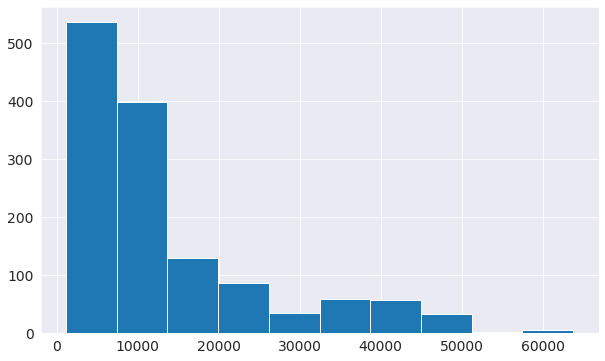

In [9]:
df['charges'].hist()

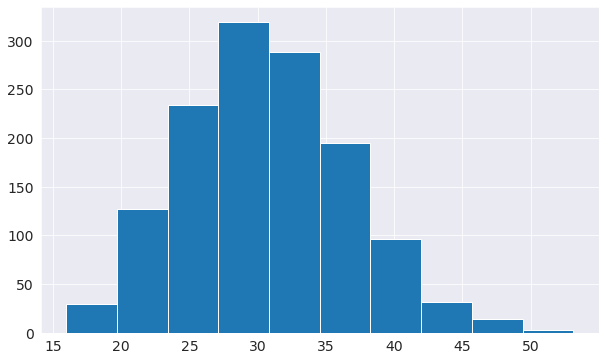

In [10]:
df['bmi'].hist()

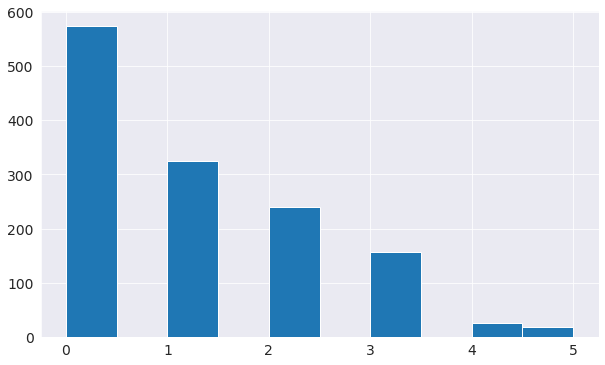

In [11]:
df['children'].hist()


Check for following
1. Data range makes sense
2. Any missing values?
3. Skewness in data columns


### Exploratory Data Analysis

#### Age

In [12]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [13]:
# Awesome thing
fig = px.histogram(df, 
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

Almost uniform, except for ages 18 and 19.

#### BMI

In [14]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [15]:
# Awesome thing
fig = px.histogram(df, color_discrete_sequence=['red'],
                   x='bmi',
                   marginal='box',
                   nbins=47,
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

Gaussian distribution and few outliers

#### Charges

In [16]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [17]:
# Awesome thing
fig = px.histogram(df, color_discrete_sequence=['green', 'grey'],
                   x='charges',
                   color='smoker',
                   marginal='box',
                   nbins=47,
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Skewed distribution and few outliers for people who are not smokers

In [18]:
# Awesome thing
fig = px.histogram(df, color_discrete_sequence=['blue', 'grey'],
                   x='charges',
                   color='sex',
                   marginal='box',
                   nbins=47,
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

High medical charges for women may be because of pregnancy.

In [19]:
# Awesome thing
fig = px.histogram(df, color_discrete_sequence=['blue', 'grey', 'green', 'red'],
                   x='charges',
                   color='region',
                   marginal='box',
                   nbins=47,
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

#### Smoker

In [20]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [21]:
# Awesome thing
fig = px.histogram(df,
                   x='smoker',
                   color='sex',
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

#### Relationship between Age and Charges

In [22]:
fig = px.scatter(df, x='age', y='charges',
                 color='smoker', opacity=0.8, hover_data=['sex'],
                   title='Age vs Charges')
fig.update_layout(bargap=0.1)
fig.show()

#### Relationship between BMI and Charges

In [23]:
fig = px.scatter(df, x='bmi', y='charges',
                 color='smoker', opacity=0.8, hover_data=['sex'],
                   title='Age vs Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [24]:
px.violin(df,x='children', y='charges', hover_data=['sex'])

#### Correlation

In [25]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

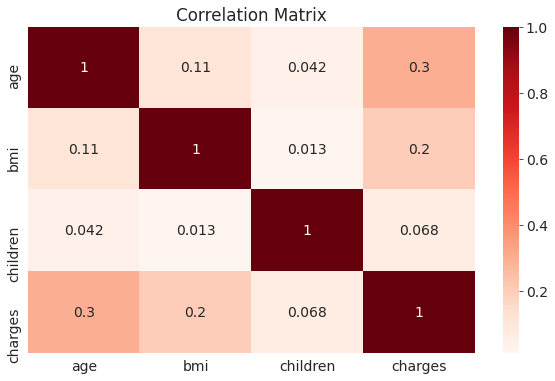

In [26]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [27]:
from scipy.stats import pointbiserialr

smoker_dict = {"yes": 1, "no": 0}
smoker_encoded = df.smoker.map(smoker_dict)

print("Point Biserial", pointbiserialr(df.charges, smoker_encoded))
print("Pearson", df.charges.corr(smoker_encoded))

Point Biserial PointbiserialrResult(correlation=0.7872514304984775, pvalue=8.271435842176839e-283)
Pearson 0.787251430498478


In [28]:
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

High correlation between smoking habits and medical charges

In [29]:
gender_dict = {"female": 1, "male": 0}
gender_encoded = df.sex.map(gender_dict)

print("Point Biserial", pointbiserialr(df.charges, gender_encoded))
print("Pearson", df.charges.corr(gender_encoded))

Point Biserial PointbiserialrResult(correlation=-0.05729206220202537, pvalue=0.036132721005947124)
Pearson -0.057292062202025484


Weak correlation between gender and medical charges


In [30]:
region_dict = {"southeast": 1, "northwest": 0, 'southwest': 2,
               'northeast': 3}
region_encoded = df.region.map(region_dict)

print("Point Biserial", pointbiserialr(df.charges, region_encoded))
print("Pearson", df.charges.corr(region_encoded))

Point Biserial PointbiserialrResult(correlation=0.003641631708064206, pvalue=0.8941285051768859)
Pearson 0.003641631708064199


No correlation

### Modelling

In [31]:
non_smoker_df = df[df.smoker == "no"]

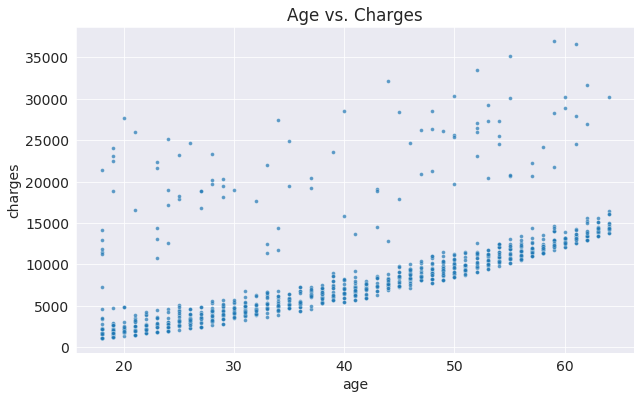

In [32]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

In [33]:
def predict(age, w, b):
  return w*age + b

In [34]:
w = 50
b=100

In [35]:
age = non_smoker_df.age
estimated_charges = predict(age, w, b)

In [36]:
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

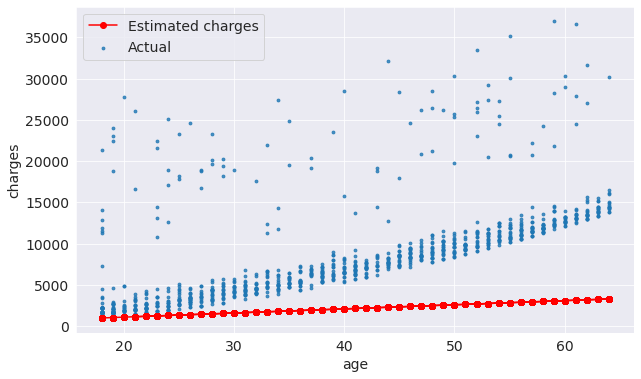

In [37]:
actual = non_smoker_df.charges 
plt.plot(age, estimated_charges, 'r-o')
plt.scatter(age, actual, s=8, alpha=0.8)
plt.xlabel('age')
plt.ylabel('charges')
plt.legend(['Estimated charges','Actual'])

In [38]:
def parameter_tune(w, b):
  ages = non_smoker_df.age
  charges = non_smoker_df.charges
  estimated_charges = predict(ages, w, b)
  plt.plot(ages, estimated_charges, 'r-o')
  plt.scatter(ages, actual, s=8, alpha=0.8)
  plt.xlabel('age')
  plt.ylabel('charges')
  plt.legend(['Estimated charges','Actual'])

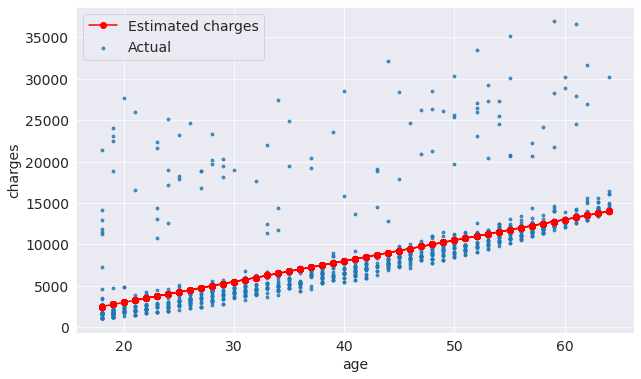

In [39]:
parameter_tune(250, -2000)

To automate this tuning of w and b, we can use loss function. 

In [40]:
def rmse(actual, predicted):
  resid = predicted - actual
  resid_squared_mean = np.mean(np.square(resid))
  rmse = np.sqrt(resid_squared_mean)
  return rmse

In [41]:
actual = non_smoker_df['charges']
predicted = predict(non_smoker_df.age, w, b)

In [42]:
rmse(actual, predicted)

8461.949562575488

In [43]:
def parameter_tune(w, b):
  ages = non_smoker_df.age
  charges = non_smoker_df.charges
  estimated_charges = predict(ages, w, b)
  plt.plot(ages, estimated_charges, 'r-o')
  plt.scatter(ages, actual, s=8, alpha=0.8)
  plt.xlabel('age')
  plt.ylabel('charges')
  plt.legend(['Estimated charges','Actual'])

  loss = rmse(charges, estimated_charges)
  print("RMSE Loss: ", loss)


RMSE Loss:  8461.949562575488


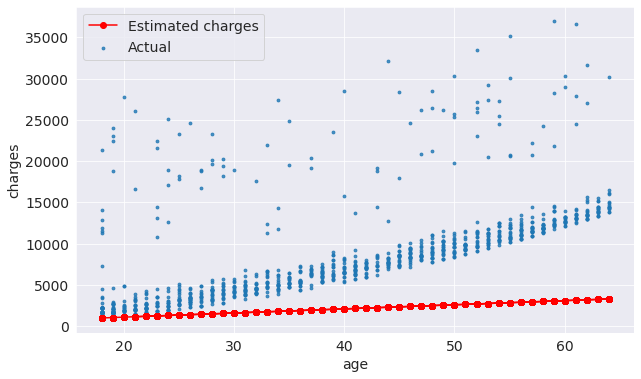

In [45]:
parameter_tune(50,100)

RMSE Loss:  4705.696807404536


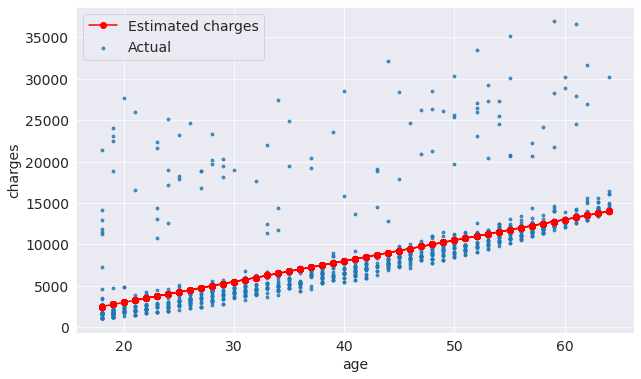

In [58]:
parameter_tune(250,-2000)

### Optimize

* OLS
* Stochastic Gradient Descent

In [ ]:
#TODO: Gradient Descent

### Using Library

In [71]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [72]:
#model = LinearRegression()

model = SGDRegressor()

In [73]:
help(model.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data
    
    y : ndarray of shape (n_samples,)
        Target values
    
    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.
    
    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.
    
    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).
    
    Returns
    -------
    self : returns an instance of self.



In [74]:
X = non_smoker_df[['age']]
y = non_smoker_df['charges']

In [75]:
model.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [76]:
predictions = model.predict(X)

In [77]:
rmse(predictions, y)

4962.228140505788

In [78]:
model.coef_, model.intercept_  # close to guess

(array([180.79663219]), array([128.7403985]))

RMSE Loss:  4962.228140505788


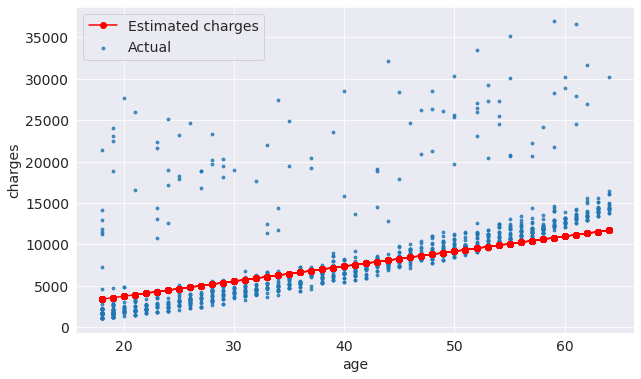

In [79]:
parameter_tune(model.coef_, model.intercept_)

OLS-Linear Regressor worked better than SGDRegressor

### Mulitple Linear Regression

In [80]:
X,y = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

model = LinearRegression().fit(X, y)

In [81]:
predictions = model.predict(X)

In [82]:
rmse(predictions, y)

4608.470405038245

### Add Categorical Features

In [85]:
smoker_dict = {"yes": 1, "no": 0}
df['smoker_encoded'] = df.smoker.map(smoker_dict)

gender_dict = {"male": 1, "female": 0}
df['gender_encoded'] = df.sex.map(gender_dict)

In [92]:
from sklearn.preprocessing import OneHotEncoder 

enc = OneHotEncoder()
one_hot = enc.fit_transform(df[['region']]).toarray()
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [93]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [100]:
use_cols = df.columns.tolist()
use_cols.remove("smoker")
use_cols.remove("sex")
use_cols.remove("region")
use_cols.remove("charges")


In [101]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_encoded,gender_encoded,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [102]:
X,y = df[use_cols], df['charges']

model = LinearRegression().fit(X, y)

In [103]:
predictions = model.predict(X)

In [104]:
rmse(predictions, y)

6041.679651174453